# Lab 1: Getting Started with Python for Machine Learning

## Learning objectives 

- Utilize Anaconda and Python to work with dataset and use machine learning
- Utilize machine learning API for feature extraction and model implementation
- Project-Based Lab: Implement simple machine learning models for activity recognition with accelerometer data

## Load dataset

We use a dataset of 3-axial accelerometer signals from an academic experiment on the UC Irvine Machine Learning Repository.

The dataset can be downloaded here: https://archive.ics.uci.edu/ml/datasets/Smartphone-Based+Recognition+of+Human+Activities+and+Postural+Transitions#
where you can also find the description of the dataset.

In [11]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import random
random.seed(7)

 #display pandas results to 3 decimal points, not in scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)


Load the accelerometer and gyroscope data.
We read the feature names from features.txt and the activity labels from activity_labels.txt

In [12]:
with open(r'C:\Users\etudi\OneDrive\Bureau\asset-v1_ArmEducationX+EDARMXML.6x+2T2022+type@asset+block@lab1\lab1\.ipynb_checkpoints\smartphone based recognition/features.txt') as f:
    features = f.read().split()

print('There are {} features.'.format(len(features)))
    
with open(r'C:\Users\etudi\OneDrive\Bureau\asset-v1_ArmEducationX+EDARMXML.6x+2T2022+type@asset+block@lab1\lab1\.ipynb_checkpoints\smartphone based recognition/activity_labels.txt') as f:
    activity_labels = f.readlines()

activity_df = [x.split() for x in activity_labels]
print('There are {} activities.'.format(len(activity_df)))
pd.DataFrame(activity_df, columns = ['Activity_id', 'Activity_label'])


There are 561 features.
There are 12 activities.


,Activity_id,Activity_label
0,1,WALKING
1,2,WALKING_UPSTAIRS
2,3,WALKING_DOWNSTAIRS
3,4,SITTING
4,5,STANDING
5,6,LAYING
6,7,STAND_TO_SIT
7,8,SIT_TO_STAND
8,9,SIT_TO_LIE
9,10,LIE_TO_SIT


The data are pre-split into training and test sets. Let's load the features x and the labels y, and have a look at a few features.

In [14]:
X_train = pd.read_table(r'C:\Users\etudi\OneDrive\Bureau\asset-v1_ArmEducationX+EDARMXML.6x+2T2022+type@asset+block@lab1\lab1\.ipynb_checkpoints\smartphone based recognition\Train/X_train.txt', header=None, sep=" ")
X_train.columns = features
X_train.iloc[:10, :10].head()

,tBodyAcc-Mean-1,tBodyAcc-Mean-2,tBodyAcc-Mean-3,tBodyAcc-STD-1,tBodyAcc-STD-2,tBodyAcc-STD-3,tBodyAcc-Mad-1,tBodyAcc-Mad-2,tBodyAcc-Mad-3,tBodyAcc-Max-1
0,0.044,-0.006,-0.035,-0.995,-0.988,-0.937,-0.995,-0.989,-0.953,-0.795
1,0.039,-0.002,-0.029,-0.998,-0.983,-0.971,-0.999,-0.983,-0.974,-0.803
2,0.040,-0.005,-0.023,-0.995,-0.977,-0.985,-0.996,-0.976,-0.986,-0.798
3,0.040,-0.012,-0.029,-0.996,-0.989,-0.993,-0.997,-0.989,-0.993,-0.798
4,0.039,-0.002,-0.024,-0.998,-0.987,-0.993,-0.998,-0.986,-0.994,-0.802


In [15]:
y_train = pd.read_table(r'C:\Users\etudi\OneDrive\Bureau\asset-v1_ArmEducationX+EDARMXML.6x+2T2022+type@asset+block@lab1\lab1\.ipynb_checkpoints\smartphone based recognition\Train/y_train.txt', header = None, sep = " ", names = ['Activity_id'])
y_train

,Activity_id
0,5
1,5
2,5
3,5
4,5
...,...
7762,2
7763,2
7764,2
7765,2


In [16]:
X_test = pd.read_table(r'C:\Users\etudi\OneDrive\Bureau\asset-v1_ArmEducationX+EDARMXML.6x+2T2022+type@asset+block@lab1\lab1\.ipynb_checkpoints\smartphone based recognition\Test/X_test.txt', header = None, sep = " ")
X_test.columns = features
print(X_test)
y_test = pd.read_table(r'C:\Users\etudi\OneDrive\Bureau\asset-v1_ArmEducationX+EDARMXML.6x+2T2022+type@asset+block@lab1\lab1\.ipynb_checkpoints\smartphone based recognition\Test/y_test.txt', header = None, sep = " ", names = ['Activity_id'])
print(y_test)

      tBodyAcc-Mean-1  tBodyAcc-Mean-2  tBodyAcc-Mean-3  tBodyAcc-STD-1  \
0               0.031           -0.009            0.040          -0.939   
1               0.043            0.001           -0.026          -0.976   
2               0.038           -0.012           -0.026          -0.994   
3               0.036           -0.018           -0.025          -0.995   
4               0.038           -0.013           -0.033          -0.994   
...               ...              ...              ...             ...   
3157            0.052           -0.039           -0.013          -0.288   
3158            0.074           -0.025           -0.018          -0.305   
3159            0.068            0.044           -0.024          -0.330   
3160            0.023            0.032           -0.012          -0.323   
3161           -0.011           -0.004           -0.038          -0.330   

      tBodyAcc-STD-2  tBodyAcc-STD-3  tBodyAcc-Mad-1  tBodyAcc-Mad-2  \
0             -0.945       

## Human activity classification
Now that we’ve loaded the train and test data into memory, we can start building a model to predict the activity from the features. We use the python library scikit-learn.

The test set must not be used until the very last step of testing (as the name suggests). So we split the given training set into training and validation sets. The training set is used for training and the validation set is used for validating the models (identifying the best model, tuning the hyperparameters).

In this lab, we'll use 5-fold cross-validation (CV), which means that the data are randomly partitioned into 5 equal-sized sub-datasets, of which 1 sub-dataset is retained as the validation data for testing the model, and the remaining 4 are used for training. The whole process is repeated 5 times, with each of the 5 sub-datasets used exactly once as the validation data. The results can then be averaged to produce a single estimation.

Let's start with a Linear Support Vector Classification.

In [17]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import validation_curve

# Declare the hyper-parameter
# - C: The amount of regularization
C_params = np.logspace(-6, 3, 10)

# Declare the classfier
clf_svc = LinearSVC(random_state = 7)

# Compute training and test scores for varying parameter values
train_scores, val_scores = validation_curve(
    clf_svc, X_train.values, y_train.values.flatten(),
    param_name = "C", param_range = C_params,
    cv = 5, scoring = "accuracy", n_jobs = -1)

The traning scores and the validation scores are saved. Now we can plot the learning curves wrt the parameter. Let's first calculate the means and the standard deviations of the validation, and then plot the training and validation accuracy vs. parameter values.

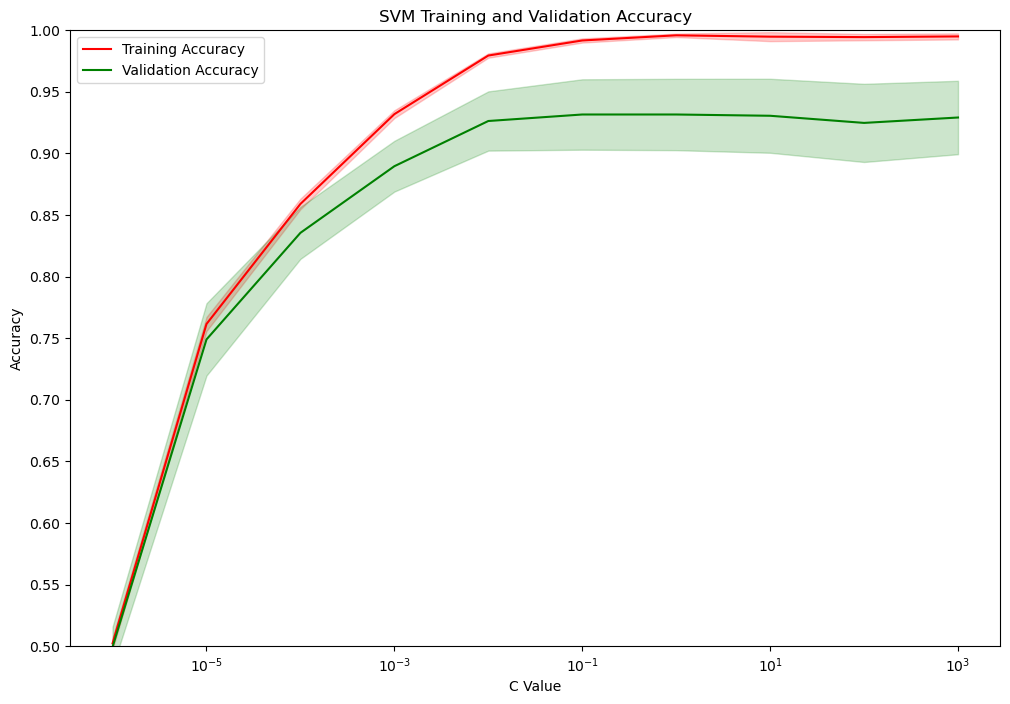

In [19]:
def plot_accuracy(train_scores, val_scores, C_params):
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)

    # To better visualize the plot, we set the y-axis limits
    y_min = 0.5
    y_max = 1.0

    f = plt.figure(figsize = (12, 8))
    ax = plt.axes()
    plt.title("SVM Training and Validation Accuracy")
    plt.xlabel("C Value")
    plt.ylabel("Accuracy")
    plt.ylim(y_min, y_max)
    plt.yticks(np.arange(y_min, y_max + .01, .05))
    plt.semilogx(C_params, train_scores_mean, label = "Training Accuracy", color = "red")
    plt.fill_between(C_params, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha = 0.2, color = "red")
    plt.semilogx(C_params, val_scores_mean, label = "Validation Accuracy",
                 color = "green")
    plt.fill_between(C_params, val_scores_mean - val_scores_std,
                     val_scores_mean + val_scores_std, alpha = 0.2, color = "green")
    plt.legend(loc = "best")

    plt.show()
    
plot_accuracy(train_scores, val_scores, C_params)

From the graph, it looks like the best value of C is at 0.1. The validation accuracy begins slowly decreasing after that 0.1, indicating that we are starting to overfit.

In [20]:
print("The mean validation score is {:.4f}".format(np.max(np.mean(val_scores, axis=1))))

The mean validation score is 0.9315


Until now we've included all the features, will a subset of features perform better than including all of them? Let's find it out.

One way would be to select particular features manually, let's look at the features list: (you can also open features.txt in a text editor)

In [1]:
features

NameError: name 'features' is not defined

In [21]:
features[0:40]

['tBodyAcc-Mean-1',
 'tBodyAcc-Mean-2',
 'tBodyAcc-Mean-3',
 'tBodyAcc-STD-1',
 'tBodyAcc-STD-2',
 'tBodyAcc-STD-3',
 'tBodyAcc-Mad-1',
 'tBodyAcc-Mad-2',
 'tBodyAcc-Mad-3',
 'tBodyAcc-Max-1',
 'tBodyAcc-Max-2',
 'tBodyAcc-Max-3',
 'tBodyAcc-Min-1',
 'tBodyAcc-Min-2',
 'tBodyAcc-Min-3',
 'tBodyAcc-SMA-1',
 'tBodyAcc-Energy-1',
 'tBodyAcc-Energy-2',
 'tBodyAcc-Energy-3',
 'tBodyAcc-IQR-1',
 'tBodyAcc-IQR-2',
 'tBodyAcc-IQR-3',
 'tBodyAcc-ropy-1',
 'tBodyAcc-ropy-1',
 'tBodyAcc-ropy-1',
 'tBodyAcc-ARCoeff-1',
 'tBodyAcc-ARCoeff-2',
 'tBodyAcc-ARCoeff-3',
 'tBodyAcc-ARCoeff-4',
 'tBodyAcc-ARCoeff-5',
 'tBodyAcc-ARCoeff-6',
 'tBodyAcc-ARCoeff-7',
 'tBodyAcc-ARCoeff-8',
 'tBodyAcc-ARCoeff-9',
 'tBodyAcc-ARCoeff-10',
 'tBodyAcc-ARCoeff-11',
 'tBodyAcc-ARCoeff-12',
 'tBodyAcc-Correlation-1',
 'tBodyAcc-Correlation-2',
 'tBodyAcc-Correlation-3']

The first 40 features are derived from time domain accelerometer 3-axial signals (for more details read features_info.txt). Let's do the same using only these 40 features.

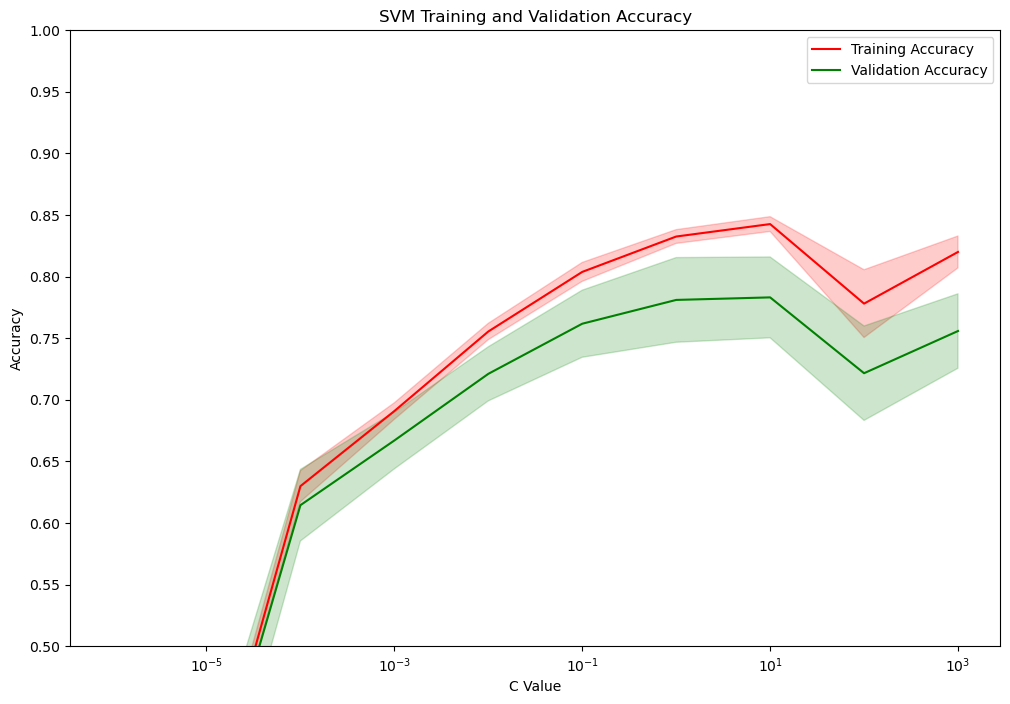

In [24]:
X_train_new = X_train.iloc[:,0:40]
X_test_new = X_test.iloc[:,0:40]

# Compute training and test scores for varying parameter values
train_scores, val_scores = validation_curve(
    clf_svc, X_train_new.values, y_train.values.flatten(),
    param_name = "C", param_range = C_params,
    cv = 5, scoring = "accuracy", n_jobs = -1)

plot_accuracy(train_scores, val_scores, C_params)

The classifier performs worse (as expected, since the feature set is not well selected).

The manual selection of subset and combinations of subsets of features could be extremely cumbersome. Let's use a more advanced function in scikit-learn.

In [32]:
from sklearn.feature_selection import SelectKBest

feature_selector = SelectKBest(k=60).fit(X_train.values, y_train.values.flatten())
X_train_new = feature_selector.transform(X_train.values)
X_test_new = feature_selector.transform(X_test.values)
# We use .values because X_train is a panda dataset
# The output of .transform is an array, therefore we don't need to use .values anymore in the validation_curve

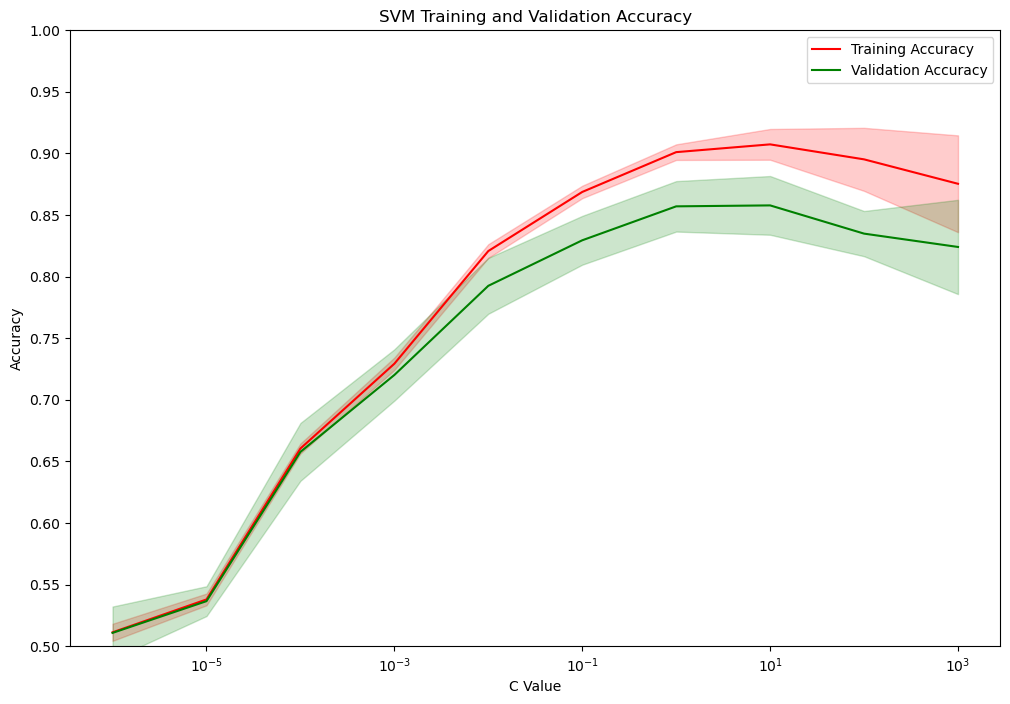

In [33]:
# Compute training and test scores for varying parameter values
train_scores, val_scores = validation_curve(
    clf_svc, X_train_new, y_train.values.flatten(),
    param_name = "C", param_range = C_params,
    cv = 5, scoring = "accuracy", n_jobs = -1)

plot_accuracy(train_scores, val_scores, C_params)

We can see that 20 best features (best according to ANOVA -- it's the default score function in SelectKBest, since we didn't specify any score_func) are not enough and the performance is worse than including all the features.

(Optional) Try with higher k to see if there is a subset of features which can perform better than including all the features.

The parameter k in SelectKBest is another parameter which should be tuned. In the documentation of the function you can find also a list of score function which can be used. As you can notice, the options are broad. Due to time limitations, we don't investigate further into feature selection during the lab session. In the following steps of this exercise we will use the feature matrices X_train and X_test including all the features.

The performance of linear SVM is already quite good, but we can investigate further and do a grid serach on different kernels and C values for the SVM model. With a larger search space, we might get a different set of optimal parameters.

Use the general Support Vector Classifier (SVC) in scikit-learn and try non-linear kernels. Use GridSearchCV in model_selection to search for the best parameters. (Read the documentation pages of SVC and GridSearchCV on scikit-learn, there you also find example codes.)

In [27]:
# import the functions SVC and GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV 

# Declare the parameters
# - Pay attention to the number of paramters you declare.
# - More points in the GridSearch will cost you longer training time.

# List of parameters
# - kernel: Type of the kernel function
#           {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
# - C: The amount of regularization
param_C = np.logspace(-6, 3, 5)
parameters = [{'kernel': ['rbf'], 'C': param_C},
              {'kernel': ['poly'], 'C': param_C, 'degree': [2,3,4]}]

# Declare the classifier (estimator) to be used in GridSearchCV
clf_svc = SVC(random_state = 7)

# Declare the classifier using GridSearchCV
clf_GSCV = GridSearchCV(estimator = clf_svc, param_grid = parameters, cv = 5, n_jobs = -1)

In [28]:
# Fit the classifier and find the best parameters using GridSearchCV
clf_GSCV.fit(X_train.values, y_train.values.flatten())

GridSearchCV(cv=5, estimator=SVC(random_state=7), n_jobs=-1,
             param_grid=[{'C': array([1.00000000e-06, 1.77827941e-04, 3.16227766e-02, 5.62341325e+00,
       1.00000000e+03]),
                          'kernel': ['rbf']},
                         {'C': array([1.00000000e-06, 1.77827941e-04, 3.16227766e-02, 5.62341325e+00,
       1.00000000e+03]),
                          'degree': [2, 3, 4], 'kernel': ['poly']}])

In [35]:
# Which one is the best model and the best parameter? What's the best CV score you got?
# (Hint: read the list of Attributes in the documentation page of GridSearchCV on scikit-learn)
print(clf_GSCV.best_params_)
print(clf_GSCV.best_score_)

# Predict on test data using the best model
clf_GSCV.score(X_test.values, y_test)

{'C': 1000.0, 'kernel': 'rbf'}
0.9380786637064809


0.9538266919671095

Now you have a general understanding of training, validating, and testing using the python library scikit-learn. The following points are optional, in case you want to explore more about the scikit-learn library.

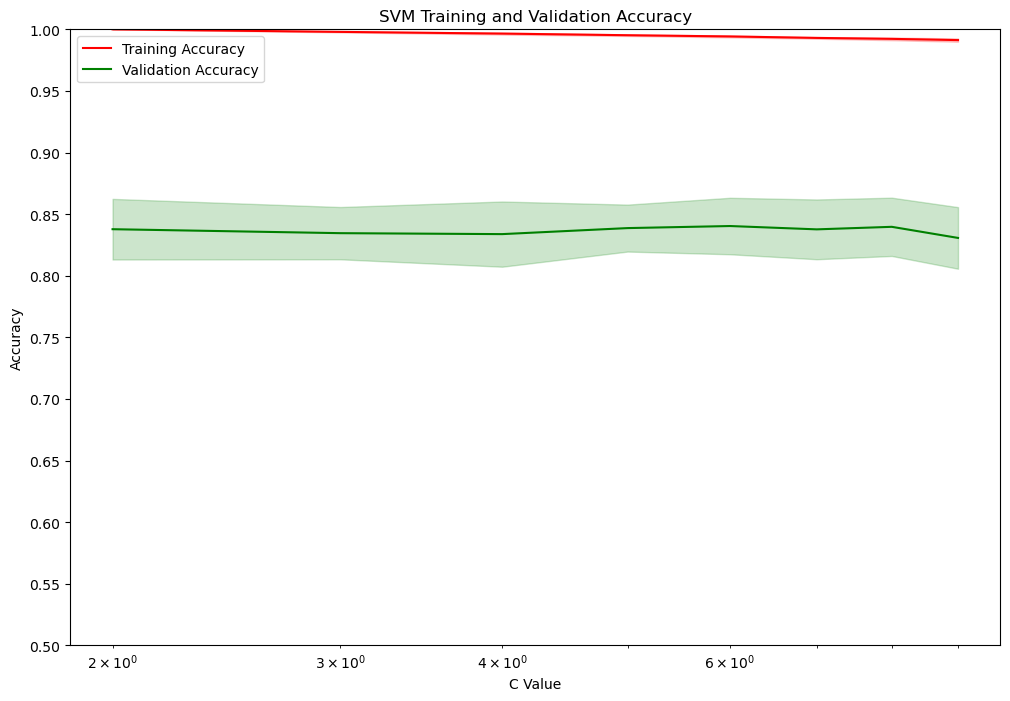

In [30]:
# Now try other classifiers, for example Decision Trees, Nearest Neighbors, or Ensemble methods. Can you get better results?
# After identifying the best model with the optimal set of parameters, test your model using the test set. 
# What's your test accuracy? Are you satisfied? How complex is your model to be deployed on a microcontroller?

# A possible solution:

# Import the classifier
from sklearn.tree import DecisionTreeClassifier

# Declare the classifier
classifier = DecisionTreeClassifier(random_state=7)

# Declare the parameter
# - min_samples_split: The minimum number of samples to split an internal node
min_samp_split = np.arange(2,10)

# Let's use validation curve
train_scores, val_scores = validation_curve(
    classifier, X_train.values, y_train.values.flatten(),
    param_name = "min_samples_split", param_range = min_samp_split,
    cv = 5, scoring = "accuracy", n_jobs = -1)

plot_accuracy(train_scores, val_scores, min_samp_split)

We can see from the plot that it doesn't perform better than SVM (the mean validation accuracy doesn't exceed 85%). Instead, linear SVM (C=0.1) and and polynomial SVM (degree 4) trained previously reach respectively 93.14% and 93.61% mean validation accuracy. The polynomial SVM reaches slightly higher accuracy, but considering that linear classifier is simpler and the performance is degradated less than 1%, for this task we would choose linear SVM. (More on algorithmic complexity in the next lectures)

In [31]:
clf_svc = LinearSVC(C=0.1, random_state = 7)
clf_svc.fit(X_train.values, y_train.values.flatten())
print("The test accuracy is {:.2f}%".format(clf_svc.score(X_test.values, y_test.values.flatten())*100))


C:\Users\etudi\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


The test accuracy is 94.72%
